In [1]:
import torch
from torch.autograd import Variable

## DATASET

In [2]:
dataset = [] #list of tuples (image, label)

zer = torch.Tensor([[0, 0, 1, 1, 1],
                    [0, 0, 1, 0, 1],
                    [0, 0, 1, 0, 1],
                    [0, 0, 1, 0, 1],
                    [0, 0, 1, 1, 1],
                   ])

one = torch.Tensor([[0, 0, 0, 1, 0],
                    [0, 0, 1, 1, 0],
                    [0, 0, 0, 1, 0],
                    [0, 0, 0, 1, 0],
                    [0, 0, 1, 1, 1],
                   ])

two = torch.Tensor([[0, 0, 1, 1, 1],
                    [0, 0, 0, 0, 1],
                    [0, 0, 1, 1, 1],
                    [0, 0, 1, 0, 0],
                    [0, 0, 1, 1, 1],
                   ])

thr = torch.Tensor([[0, 0, 1, 1, 1],
                    [0, 0, 0, 0, 1],
                    [0, 0, 0, 1, 1],
                    [0, 0, 0, 0, 1],
                    [0, 0, 1, 1, 1],
                   ])

fou = torch.Tensor([[0, 0, 1, 0, 1],
                    [0, 0, 1, 0, 1],
                    [0, 0, 1, 1, 1],
                    [0, 0, 0, 0, 1],
                    [0, 0, 0, 0, 1],
                   ])

fiv = torch.Tensor([[0, 0, 1, 1, 1],
                    [0, 0, 1, 0, 0],
                    [0, 0, 1, 1, 1],
                    [0, 0, 0, 0, 1],
                    [0, 0, 1, 1, 1],
                   ])

six = torch.Tensor([[0, 0, 1, 1, 1],
                    [0, 0, 1, 0, 0],
                    [0, 0, 1, 1, 1],
                    [0, 0, 1, 0, 1],
                    [0, 0, 1, 1, 1],
                   ])

sev = torch.Tensor([[0, 0, 1, 1, 1],
                    [0, 0, 0, 0, 1],
                    [0, 0, 0, 0, 1],
                    [0, 0, 0, 0, 1],
                    [0, 0, 0, 0, 1],
                   ])

eig = torch.Tensor([[0, 0, 1, 1, 1],
                    [0, 0, 1, 0, 1],
                    [0, 0, 1, 1, 1],
                    [0, 0, 1, 0, 1],
                    [0, 0, 1, 1, 1],
                   ])

nin = torch.Tensor([[0, 0, 1, 1, 1],
                    [0, 0, 1, 0, 1],
                    [0, 0, 1, 1, 1],
                    [0, 0, 0, 0, 1],
                    [0, 0, 1, 1, 1],
                   ])

dataset.append((zer, torch.Tensor([0])))
dataset.append((one, torch.Tensor([1])))
dataset.append((two, torch.Tensor([2])))
dataset.append((thr, torch.Tensor([3])))
dataset.append((fou, torch.Tensor([4])))
dataset.append((fiv, torch.Tensor([5])))
dataset.append((six, torch.Tensor([6])))
dataset.append((sev, torch.Tensor([7])))
dataset.append((eig, torch.Tensor([8])))
dataset.append((nin, torch.Tensor([9])))



### Take a look into how the data looks like

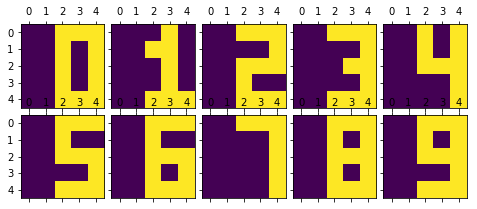

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from PIL import Image

fig = plt.figure(1,(8., 8.))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(2 , 5),
                 axes_pad=0.1)

for i, (data, target) in enumerate(dataset):
    grid[i].matshow(Image.fromarray(data.numpy()))
    
plt.show()

## MODEL

In [4]:
from torch import nn
import torch.nn.functional as F
import torch.optim as optim

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.output_layer = nn.Linear(5*5, 10)

    def forward(self, x):
        x = self.output_layer(x)
        return F.log_softmax(x)
    

In [39]:
model = Model()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.1)

## Training

#### Train for a single epoch

In [21]:
def train(model, optim, dataset):
    model.train()
    avg_loss = 0
    for i, (data, target) in enumerate(dataset):
        data = data.view(1, -1)
        data, target = Variable(data), Variable(target.long())
        optimizer.zero_grad()
        output = model(data)

        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        avg_loss += loss.data[0]
        
    return avg_loss/len(dataset)

### DATASET - MODEL - OUTPUT

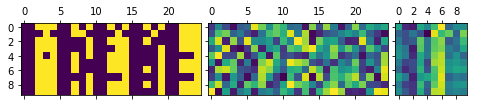

In [40]:
fig = plt.figure(1, (8., 8.))
grid = ImageGrid(fig, 111,
                     nrows_ncols=(1, 3),
                     axes_pad=0.1)


data = [data.view(-1) for data, target in dataset]
data = torch.stack(data)

target = [target.view(-1) for data, target in dataset]
target = torch.stack(target)
grid[0].matshow(Image.fromarray(data.numpy()))
grid[1].matshow(Image.fromarray(model.output_layer.weight.data.numpy()))

output = model(Variable(data))
grid[2].matshow(Image.fromarray(output.data.numpy()))

plt.show()

#### Train the model once and see how it works

In [41]:
train(model, optimizer, dataset)

2.3488091826438904

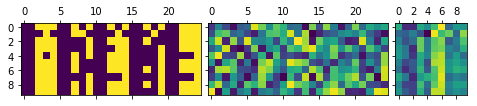

In [42]:
fig = plt.figure(1, (8., 8.))
grid = ImageGrid(fig, 111,
                     nrows_ncols=(1, 3),
                     axes_pad=0.1)


data = [data.view(-1) for data, target in dataset]
data = torch.stack(data)

target = [target.view(-1) for data, target in dataset]
target = torch.stack(target)
grid[0].matshow(Image.fromarray(data.numpy()))
grid[1].matshow(Image.fromarray(model.output_layer.weight.data.numpy()))

output = model(Variable(data))
grid[2].matshow(Image.fromarray(output.data.numpy()))

plt.show()


In [44]:
pred = output.data.max(1)[1] 
correct = pred.eq(target.long()).sum()
print('correct: {}/{}'.format(correct, len(dataset)))

correct: 1/10


In [15]:
def train_epochs(epochs, model, optim dataset, print_every=100):
    snaps = []
    for epoch in range(epochs):
        avg_loss = train(model, optim, dataset)
        if not epoch % 10:
            print('epoch: {}, loss:{}'.format(epoch, avg_loss/len(dataset)/10))
            snaps.append(test_and_print(model, dataset))
            
    return snaps

In [19]:
fig = plt.figure(1, (8., 8.))
grid = ImageGrid(fig, 111,
                     nrows_ncols=(len(snaps) , 3),
                     axes_pad=0.1)

for i, snap in enumerate(snaps):
    for j, image in enumerate(snap):
        grid[i * 3 + j].matshow(image)
        
plt.show()

KeyboardInterrupt: 

In [ ]:
one = model(Variable(dataset[5][0].view(1, -1)))
print(one.max(1)[1])

In [8]:
def test_and_print(model, dataset):
    correct = 0
    loss = 0
    fig = plt.figure(1,(8., 8.))
    grid = ImageGrid(fig, 111,
                     nrows_ncols=(1 , 3),
                     axes_pad=0.1)

    data = [data.view(1, -1) for data, target in dataset]
    data = torch.stack(data).squeeze()

    target = [target.view(1, -1) for data, target in dataset]
    target = torch.stack(target).squeeze()
    grid[0].matshow(Image.fromarray(data.numpy()))
    grid[1].matshow(Image.fromarray(model.output_layer.weight.data.numpy()))
    
    output = model(Variable(data))
    grid[2].matshow(Image.fromarray(output.data.numpy()))

    pred = output.data.max(1)[1] 
    print(pred.size())
    print(target.size())
    correct += pred.eq(target.long()).sum()
    
    print('correct: {}/{}'.format(correct, len(dataset)))
    
    plt.show()
    return Image.fromarray(data.numpy()), Image.fromarray(model.output_layer.weight.data.numpy()), Image.fromarray(output.data.numpy())

In [ ]:
test_and_print(model, dataset)